In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [99]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
df = pd.read_csv('drive/My Drive/1er_Parcial_IA/Datos_Etiquetados.csv', encoding='latin-1')

In [101]:
df

,Semestre,Convocatoria,Ciclo,Firma,1P,T,Asistencia,Requisito,Civil,Electronica,Industrial,Mecanica,Anho2021,Anho2022,Recursando,CantMaterias,Abandono
0,4,0,0,0,0,2,1,1,0,0,0,1,1,0,0,6,1
1,4,1,1,0,0,0,1,0,0,0,0,1,1,0,1,4,1
2,4,0,0,0,0,0,1,0,0,0,0,1,0,1,1,3,1
3,4,1,1,0,0,0,0,0,0,0,0,1,0,1,1,5,1
4,4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,4,0,0,0,13,4,1,1,1,0,0,0,0,1,0,5,0
1602,4,1,1,0,16,9,1,1,1,0,0,0,0,1,1,5,0
1603,4,0,0,0,8,6,1,1,1,0,0,0,1,0,0,4,0
1604,4,1,1,0,0,0,1,0,0,0,0,1,1,0,0,7,1


In [111]:
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]
X

,Semestre,Convocatoria,Ciclo,Firma,1P,T,Asistencia,Requisito,Civil,Electronica,Industrial,Mecanica,Anho2021,Anho2022,Recursando,CantMaterias
0,4,0,0,0,0,2,1,1,0,0,0,1,1,0,0,6
1,4,1,1,0,0,0,1,0,0,0,0,1,1,0,1,4
2,4,0,0,0,0,0,1,0,0,0,0,1,0,1,1,3
3,4,1,1,0,0,0,0,0,0,0,0,1,0,1,1,5
4,4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,4,0,0,0,13,4,1,1,1,0,0,0,0,1,0,5
1602,4,1,1,0,16,9,1,1,1,0,0,0,0,1,1,5
1603,4,0,0,0,8,6,1,1,1,0,0,0,1,0,0,4
1604,4,1,1,0,0,0,1,0,0,0,0,1,1,0,0,7


In [112]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,y_train,y_test = train_test_split(X,Y,test_size=0.10,random_state=42)

In [113]:
X_Train.shape,y_train.shape

((1445, 16), (1445,))

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay, roc_curve
log_reg = LogisticRegression(fit_intercept=True,penalty='l2',C=1.0,max_iter=10000)
log_reg.fit(X_Train,y_train,)

LogisticRegression(max_iter=10000)

In [115]:
predictions = log_reg.predict(X_Test)

In [116]:
cm = metrics.confusion_matrix(y_test, predictions)

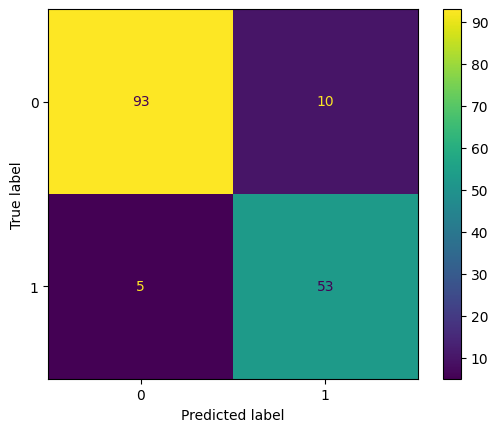

In [117]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [118]:
import joblib

In [119]:
joblib.dump(log_reg,'drive/My Drive/1er_Parcial_IA/Modelo_regresion_logistica.pkl')

['drive/My Drive/1er_Parcial_IA/Modelo_regresion_logistica.pkl']